In [1]:
import numpy as np

In [2]:
def split_sequence(sequence, n_steps):
    X, y = [], []

    for i in range(len(sequence)):
        end_ix = i+n_steps

        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [3]:
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])

In [7]:
out_seq = np.array([seq_1+seq_2 for seq_1, seq_2 in zip(in_seq1, in_seq2)])
out_seq

array([[ 25],
       [ 45],
       [ 65],
       [ 85],
       [105],
       [125],
       [145],
       [165],
       [185]])

In [8]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [11]:
data = np.hstack((in_seq1, in_seq2, out_seq))
data

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [30]:
n_steps = 3

In [31]:
X, y = split_sequence(data, n_steps)

In [32]:
for i, j in zip(X, y):
    print(i, j)

[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


In [33]:
n_input = X.shape[1] * X.shape[2]
X = X.flatten()
X = X.reshape((-1, n_input))
X

array([[ 10,  15,  25,  20,  25,  45,  30,  35,  65],
       [ 20,  25,  45,  30,  35,  65,  40,  45,  85],
       [ 30,  35,  65,  40,  45,  85,  50,  55, 105],
       [ 40,  45,  85,  50,  55, 105,  60,  65, 125],
       [ 50,  55, 105,  60,  65, 125,  70,  75, 145],
       [ 60,  65, 125,  70,  75, 145,  80,  85, 165]])

In [35]:
n_output = y.shape[1]

In [36]:
import tensorflow as tf

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_dim=n_input, use_bias=True),
    tf.keras.layers.Dense(n_output, use_bias=False)
])

In [52]:
model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1000      
                                                                 
 dense_5 (Dense)             (None, 3)                 300       
                                                                 
Total params: 1,300
Trainable params: 1,300
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X, y, epochs=2000, verbose=0)

In [55]:
import matplotlib.pyplot as plt

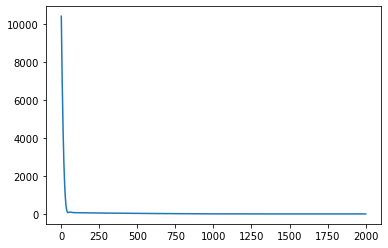

In [56]:
plt.plot(list(range(1, len(history.history['loss'])+1)), history.history['loss'])

In [57]:
x_input = np.array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
yhat

array([[100.492325, 105.38966 , 207.02783 ]], dtype=float32)